In [1]:
import numpy as np
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv(r"Downloads\train.csv")

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
train["Loan_Status"]=train["Loan_Status"].replace({"Y":1,"N":0})

In [8]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [9]:
train.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,614,601,611,599,614,582,614
unique,614,2,2,4,2,2,3
top,LP002892,Male,Yes,0,Graduate,No,Semiurban
freq,1,489,398,345,480,500,233


In [10]:
#Inference :
#1.Loan applicant incomes ranges from 150 to 81000.
#2.Co applicant income ranges from 9 to 700.
#3.0.687296% of applicant's loan get approved.
#4.Loan amount ranges from 9 to 700.
#5.398 applicants are married.
#6.Most of applicants have their property in semiurban area.

# Data Cleaning for Training Dataset

In [11]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

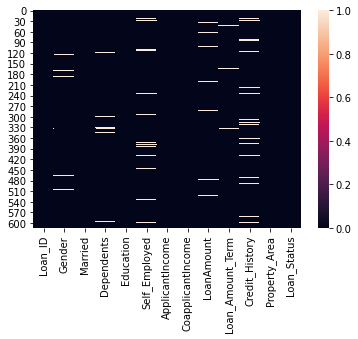

In [12]:
sns.heatmap(train.isna())

In [13]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


<AxesSubplot:>

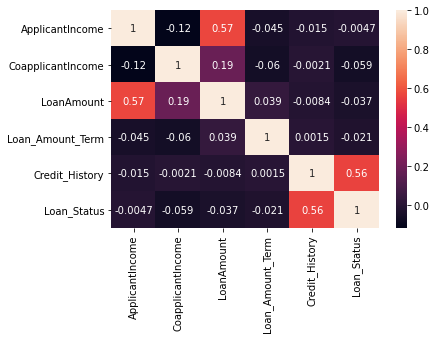

In [14]:
sns.heatmap(train.corr(),annot=True)

C:\Users\Mayur\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

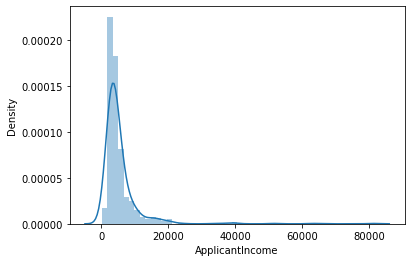

In [15]:
sns.distplot(train["ApplicantIncome"],kde=True)

Applicant income is right skewed.

C:\Users\Mayur\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

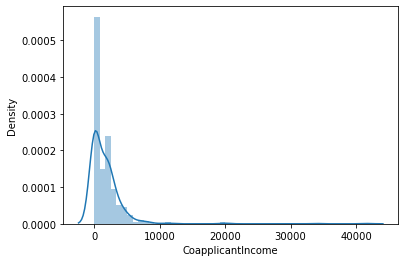

In [16]:
sns.distplot(train["CoapplicantIncome"],kde=True)

Co applicant income is right skewed as well.

C:\Users\Mayur\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

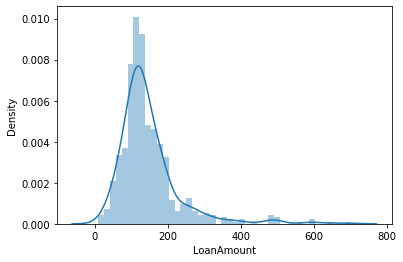

In [17]:
sns.distplot(train["LoanAmount"])

Here,Loan Amount is seems to be right skewed.Therefore,replace the null value in Loan Amount column with it's respective median.

In [18]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

C:\Users\Mayur\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

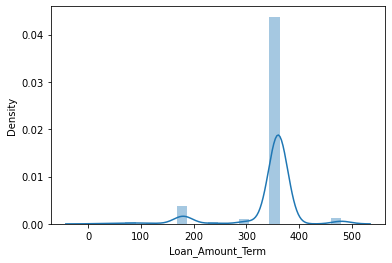

In [19]:
sns.distplot(train["Loan_Amount_Term"],kde=True)

Loan_Amount_Term is seems to be left skewed.Therefore,replace the null value in Loan Amount column with it's respective median value.

In [20]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].median(),inplace=True)

C:\Users\Mayur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

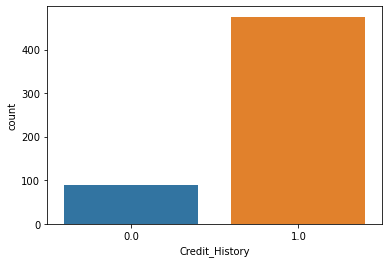

In [21]:
sns.countplot(train["Credit_History"])

Approx.85% of the applicants have their past credit guidelines met. Replace the null value in credit history column with it's respective mode.

In [22]:
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

C:\Users\Mayur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

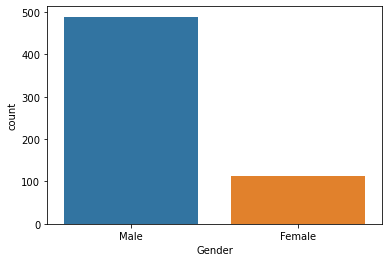

In [23]:
sns.countplot(train["Gender"])

Major of the applicants are Male.

In [24]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)

C:\Users\Mayur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

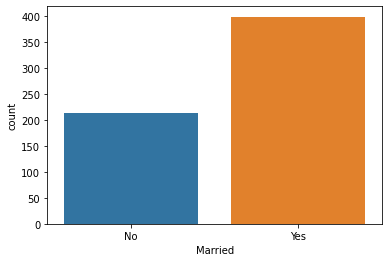

In [25]:
sns.countplot(train["Married"])

Major of the applicants are married.

In [26]:
train["Married"].fillna(train["Married"].mode()[0],inplace=True)

C:\Users\Mayur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

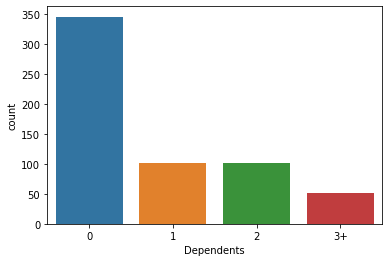

In [27]:
sns.countplot(train["Dependents"])

Most of the applicants have 0 dependents.

In [28]:
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)

C:\Users\Mayur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

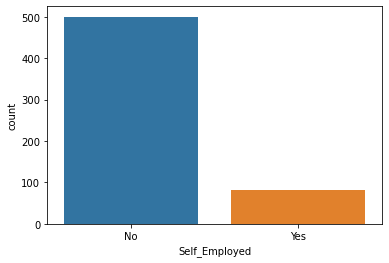

In [29]:
sns.countplot(train["Self_Employed"])

Majority of people are working.

In [30]:
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)

C:\Users\Mayur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

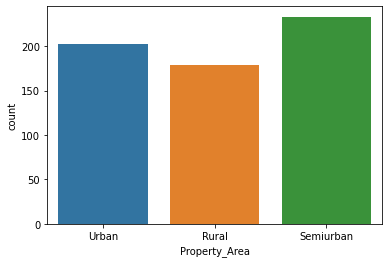

In [31]:
sns.countplot(train["Property_Area"])

Property area are  aprox.equaly distributed in all area.

C:\Users\Mayur\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

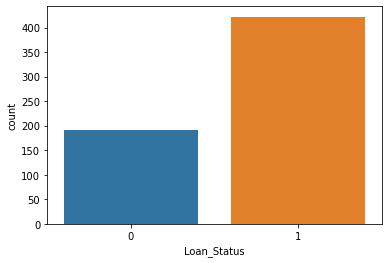

In [32]:
sns.countplot(train["Loan_Status"])

Most of application are approved.

In [33]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

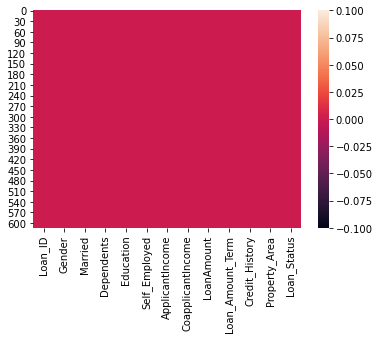

In [34]:
sns.heatmap(train.isna())

In [35]:
train.drop(["Loan_ID"],axis=1,inplace=True)

In [36]:

train["Gender"]=train["Gender"].replace({"Male":1,"Female":0})
train["Married"]=train["Married"].replace({"Yes":1,"No":0})
train["Self_Employed"]=train["Self_Employed"].replace({"Yes":1,"No":0})                                        

In [37]:
from sklearn.preprocessing import LabelEncoder
feature_col=["Property_Area","Education","Dependents"]
le=LabelEncoder()

In [38]:
for col in feature_col:
    train[col]=le.fit_transform(train[col])

In [39]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [40]:
train["Gender"].unique()

array([1, 0], dtype=int64)

In [41]:
train.shape

(614, 12)

In [42]:
from sklearn.model_selection import train_test_split
X=train.drop("Loan_Status",axis=1)
y=train["Loan_Status"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
print(X_train.shape)

(491, 11)


In [44]:
print(y_train.shape)

(491,)


# Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
pred1=gnb.predict(X_test)

In [47]:
pred1

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [48]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [49]:
def loss(y_true,y_pred):
    precision=precision_score(y_true,y_pred)
    recall=recall_score(y_true,y_pred)
    accuracy=accuracy_score(y_true,y_pred)
    
    return precision,recall,accuracy

    

In [50]:
loss(y_test,pred1)

(0.7766990291262136, 0.9523809523809523, 0.7804878048780488)

In [51]:
Score1=loss(y_test,pred1)[2]

# SVM

In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
param_grid={"C":[0.1,1,10,100,1000],
            "gamma":[1,0.1,0.01,0.001,0.0001],
            "kernel":["rbf"]}
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.694 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [53]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [54]:
svc=SVC(C= 1, gamma= 0.001, kernel= 'rbf')
svc.fit(X_train,y_train)
pred2=svc.predict(X_test)
loss(y_test,pred2)

(0.6982758620689655, 0.9642857142857143, 0.6910569105691057)

In [55]:
Score2=loss(y_test,pred2)[2]

In [56]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [57]:
from xgboost import XGBClassifier
xgb=XGBClassifier(learning_rate=0.1,
                 n_estimator=1000,
                 max_depth=3,
                 min_child_weight=1,
                 gamma=0,
                 subsample=0.8,
                 colsample_bytree=0.8,
                 objective="binary:logistic",
                 nthread=4,
                 scale_pos_weight=1,
                  seed=27)
xgb.fit(X_train,y_train)

C:\Users\Mayur\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:01:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:01:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=1000, n_estimators=100, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', random_state=27,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              subsample=0.8, tree_method='exact', validate_parameters=1, ...)

In [58]:
pred3=xgb.predict(X_test)
loss(y_test,pred3)

(0.75, 0.9285714285714286, 0.7398373983739838)

In [59]:
Score3=loss(y_test,pred3)[2]

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
def randomized_search(params,runs=20,clf=DecisionTreeClassifier(random_state=2)):
    rand_clf=RandomizedSearchCV(clf,params,n_iter=runs,cv=5,n_jobs=1,random_state=2)
    rand_clf.fit(X_train,y_train)
    best_model=rand_clf.best_estimator_
    
    best_score=rand_clf.best_score_
    
    print(best_score)
    y_pred=best_model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(accuracy)
    
    return best_model

In [61]:
randomized_search(params={"criterion":["entropy","gini"],
                          "splitter":["random","best"],
                          "min_weight_fraction_leaf":[0.0,0.0025,0.005,0.0075,0.01],
                          "min_samples_split":[2,3,4,5,6,8,9,10],
                          "min_samples_leaf":[1,0.01,0.02,0.03,0.04],
                          "min_impurity_decrease":[0.0,0.0005,0.005,0.05,0.10,0.15,0.2],
                          "max_leaf_nodes":[10,15,20,25,30,35,40,45,50,None],
                          "max_features":["auto",0.95,0.90,0.85,0.80,0.75,0.70],
                          "max_depth":[None,2,4,6,8],
                          "min_weight_fraction_leaf":[0.0,0.0025,0.005,0.0075,0.01,0.05]
                         })

0.8187384044526901
0.7723577235772358


DecisionTreeClassifier(max_depth=6, max_features=0.95, max_leaf_nodes=20,
                       min_impurity_decrease=0.1, min_samples_leaf=0.04,
                       min_samples_split=5, min_weight_fraction_leaf=0.005,
                       random_state=2, splitter='random')

In [62]:
ds=DecisionTreeClassifier(max_depth=8, max_features=0.7,
                       min_impurity_decrease=0.005, min_samples_split=8,
                       min_weight_fraction_leaf=0.0025, random_state=2)

In [63]:
ds.fit(X_train,y_train)
pred4=ds.predict(X_test)
loss(y_test,pred4)

(0.7547169811320755, 0.9523809523809523, 0.7560975609756098)

In [64]:
Score4=loss(y_test,pred4)[2]

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
logreg=LogisticRegression()

In [67]:
logreg.fit(X_train,y_train)

C:\Users\Mayur\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
pred5=logreg.predict(X_test)

In [69]:
loss(y_test,pred5)

(0.7547169811320755, 0.9523809523809523, 0.7560975609756098)

In [70]:
Score5=loss(y_test,pred5)[2]

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train,y_train)
pred6=random_forest.predict(X_test)


In [73]:
loss(y_test,pred6)

(0.77, 0.9166666666666666, 0.7560975609756098)

In [74]:
Score6=loss(y_test,pred6)[2]

In [75]:
pred_values=pd.DataFrame({"Model":["Naive Bayes","Support Vector Machines","XgBoost","Decision Tree","Logistic Regression","Random Forest"],"Score":[Score1,Score2,Score3,Score4,Score5,Score6]})

In [76]:
pred_values.sort_values(by="Score",ascending=False)

,Model,Score
0,Naive Bayes,0.780488
3,Decision Tree,0.756098
4,Logistic Regression,0.756098
5,Random Forest,0.756098
2,XgBoost,0.739837
1,Support Vector Machines,0.691057


In [87]:
import pickle as pkl

In [88]:
Naive_Bayes_Model=GaussianNB()
Naive_Bayes_Model.fit(X_train,y_train)

GaussianNB()

In [89]:
filename = 'Naive_Bayes_Model.pk'
pkl.dump(Naive_Bayes_Model, open(filename, 'wb'))

In [90]:
loaded_model = pkl.load(open(filename, 'rb')) 
result = loaded_model.score(X_test, y_test)

In [91]:
loaded_model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [82]:
pwd()

'C:\\Users\\Mayur'